<div style="text-align: center;">
    <h1>Assignment 02</h1>
    <h1>孙健玮      12440018</h1>
</div>

# 1. 任务描述
1. 使⽤PyTorch下载MNIST数据集，包括训练集和测试集。
2. 使⽤PyTorch分别实现Logistic Regression模型和MLP（多层感知机）模型。
3. 分别使⽤Logistic Regression模型和MLP模型进⾏训练，调试参数并获得较好的训练结果。
4. 分别记录训练集的Loss并画出曲线。
5. 针对测试集使⽤Accuracy评估模型的性能，讨论两个模型的训练结果并给出⾃⼰的结论。

# 2. 编程模块

## 2.1 数据加载

In [19]:
import torch
from torchvision import transforms, datasets


# 定义数据预处理操作
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为Tensor
    transforms.Normalize((0.5,), (0.5,))  # 对图像进行标准化处理
])

# 下载训练集MNIST手写数字数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 加载数据
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

## 2.2 定义模型

In [20]:
import torch.nn as nn

# Logistic Regression模型
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self). __init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# MLP模型
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## 2.3 训练模型

In [21]:
import torch.optim as optim

def train_model(model, train_loader, criterion, optimiser, num_epochs):
    """训练模型
    :param model: 模型
    :param train loader
    :训练数据加载器
    :param criterion
    :损失函数:param optimizer
    :优化器:param num_epochs
    :训练轮数:return
    :训练过程中的损失列表
    """
    model.train()   # 将模型设置为训练模式
    losses = []    # 保存每个epoch的loss
        
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            # 将图片展平为向量，适用于全连接网络
            images = images.view(-1, 28*28)
            
            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 反向传播和优化
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            
            # 记录损失
            epoch_loss += loss.item()
            if (i + 1) % 100 == 0:
                print(f'Eposh [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
                
        # 记录每个epoch的平均损失
        losses.append(epoch_loss / len(train_loader))
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss {epoch_loss / len(train_loader):.4f}')
        
    return losses
            

## 2.4 测试模块

In [22]:
def test_model(model, test_loader):
    """测试模型
    :param model: 模型
    :param test_loader: 测试数据加载器
    :return: 测试准确率
    """
    model.eval() # 将模型设置为测试模式
    correct = 0
    total = 0
    
    with torch.no_grad():   # 测试过程中不需要计算梯度
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy}%')
    return accuracy

## 2.5 训练及测试模型并保存损失曲线

In [23]:
import matplotlib.pyplot as plt

def train_test_loss(lr, num_epoch, hidden_dim):
    # 定义模型参数
    input_dim = 28 * 28
    output_dim = 10
    
    # 定义模型
    logistic_model = LogisticRegression(input_dim, output_dim)
    mlp_model = MLP(input_dim, hidden_dim, output_dim)
    
    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()   # 使用交叉熵损失函数
    logistic_optimser = optim.SGD(logistic_model.parameters(), lr)
    mlp_optimiser = optim.SGD(mlp_model.parameters(), lr)
    
    # 训练模型
    logistic_losses = train_model(logistic_model, train_loader, criterion, logistic_optimser, num_epoch)
    mlp_losses = train_model(mlp_model, train_loader, criterion, mlp_optimiser, num_epoch)
    
    # 验证模型
    logistic_accuracy = test_model(logistic_model, test_loader)
    mlp_accuracy = test_model(mlp_model, test_loader)
    
    # 绘制Loss曲线
    plt.plot(logistic_losses, label='Logistic Regression')
    plt.plot(mlp_losses, label='MLP')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss Curves')

    # 在图中添加训练参数信息
    fig = plt.gcf()
    fig.text(0.6, 0.7, f'Learning Rate: {lr}', fontsize=12)
    fig.text(0.6, 0.65, f'Hidden Dim: {hidden_dim}', fontsize=12)
    fig.text(0.6, 0.6, f'Epochs: {num_epoch}', fontsize=12)
    fig.text(0.6, 0.55, f'Logistic Acc: {logistic_accuracy}%', fontsize=12, color="red", fontweight="bold")
    fig.text(0.6, 0.5, f'MLP Acc: {mlp_accuracy}%', fontsize=12, color="blue", fontweight="bold")
    # 保存图像
    plt.savefig(f'../result/[lr={lr}, hidden_dim={hidden_dim}, epoch={num_epoch}].png')

    plt.show()

## 2.6 主程序

Eposh [1/20], Step [100/235], Loss: 0.5671
Eposh [1/20], Step [200/235], Loss: 0.3721
Epoch [1/20], Loss 0.9684
Eposh [2/20], Step [100/235], Loss: 0.2925
Eposh [2/20], Step [200/235], Loss: 0.4433
Epoch [2/20], Loss 0.3726
Eposh [3/20], Step [100/235], Loss: 0.2955
Eposh [3/20], Step [200/235], Loss: 0.3099
Epoch [3/20], Loss 0.3380
Eposh [4/20], Step [100/235], Loss: 0.3249
Eposh [4/20], Step [200/235], Loss: 0.4238
Epoch [4/20], Loss 0.3238
Eposh [5/20], Step [100/235], Loss: 0.3400
Eposh [5/20], Step [200/235], Loss: 0.3558
Epoch [5/20], Loss 0.3173
Eposh [6/20], Step [100/235], Loss: 0.3651
Eposh [6/20], Step [200/235], Loss: 0.2801
Epoch [6/20], Loss 0.3121
Eposh [7/20], Step [100/235], Loss: 0.3397
Eposh [7/20], Step [200/235], Loss: 0.2297
Epoch [7/20], Loss 0.3013
Eposh [8/20], Step [100/235], Loss: 0.3589
Eposh [8/20], Step [200/235], Loss: 0.2627
Epoch [8/20], Loss 0.2999
Eposh [9/20], Step [100/235], Loss: 0.3084
Eposh [9/20], Step [200/235], Loss: 0.2521
Epoch [9/20], Loss

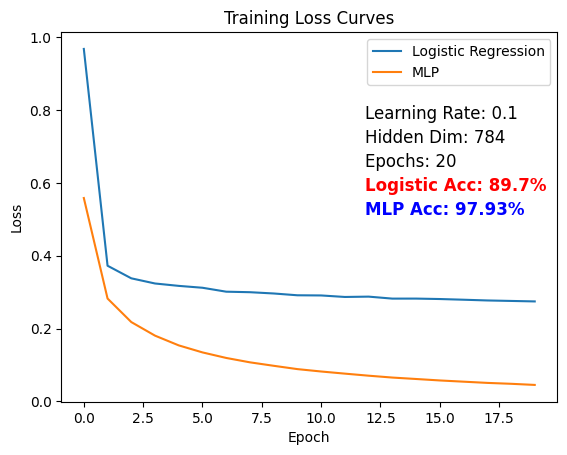

In [24]:


if __name__ == "__main__":
    # 训练参数（研究的参数）
    lr = 0.1
    num_epoch = 20
    hidden_dim = 28 * 28
    train_test_loss(lr, num_epoch, hidden_dim)
    
    # # 多参数组合训练
    # lrs = [0.1, 0.01, 0.001, 0.0001]
    # num_epochs = [10, 20, 50, 100]
    # hidden_dims = [28, 28 * 28, 28 * 28 * 28]
    
    # for i in lrs:
    #     for j in num_epochs:
    #         for k in hidden_dims:
    #             train_test_loss(i, j, k)
    

# 3 讨论与结论
## 3.1 训练过程
设定了系列学习率（0.1、0.001、0.0001、0.0001）、系列MLP隐藏层的维度（28、 28*28、 28*28*28）、系列训练周期（10、20、50、100）并进行参数组合进行训练，共计48种组合方式，训练得到48个模型，并测试模型的正确率。
## 3.2 训练结果分析
学习率是深度学习中一个重要超参数，低学习率可以提供更稳定的训练过程，但可能导致收敛速度慢，增加训练时间；高学习率可以加快模型参数更新的速度，可能使模型更快地收敛。然而，如果设置得过高，可能导致模型无法收敛，甚至发散。
因此首先在低隐藏层维度下研究不同学习率下模型训练效果随训练周期的变化，结果如图1到图4所示：

<div align="center">
  <img src="https://raw.githubusercontent.com/SunJianwei829/ML-Project/main/result/image1.png" alt="Example Image" width="800" height="600">
  <p align="center">图 1. 学习率为0.0001时的损失曲线</p>
</div>

<div align="center">
  <img src="https://raw.githubusercontent.com/SunJianwei829/ML-Project/main/result/image2.png" alt="Example Image" width="800" height="600">
  <p align="center">图 2. 学习率为0.001时的损失曲线</p>
</div>

<div align="center">
  <img src="https://raw.githubusercontent.com/SunJianwei829/ML-Project/main/result/image3.png" alt="Example Image" width="800" height="600">
  <p align="center">图 3. 学习率为0.01时的损失曲线</p>
</div>

<div align="center">
  <img src="https://raw.githubusercontent.com/SunJianwei829/ML-Project/main/result/image4.png" alt="Example Image" width="800" height="600">
  <p align="center">图 4. 学习率为0.1时的损失曲线</p>
</div>

1. 当学习率为0.0001时，逻辑回归模型在训练初期的准确率远高于MLP模型，随着训练周期数的增加，逻辑回归模型和MLP模型的准确率都在提高，MLP模型准确率提升明显但是准确率始终低于逻辑回归模型，但是经过100个周期训练后两者的准确率均低于90%。
2. 当学习率提高到0.001时，MLP模型在训练初期准确率略低于逻辑回归模型，当训练周期增加到100次，两个模型的准确率均超过了90%，MLP模型的准确率略高。
3. 当学习率提高到0.01，在10个训练周期结束，两个模型的准确率均达到了90%，且随着训练周期增加，两个模型的准确率在不断上升，但MLP模型准确率提升更明显。
4. 继续提高学习率到0.1，逻辑回归模型的准确率与学习率为0.01时的大致相同，但准确率开始在91%附近震荡，而MLP模型的准确率在10个周期训练后便达到了94%，随着训练周期增加有微小提升，但经过100个周期训练后仍没能超过96%，且在经过70多个周期训练后出现一次较大的波动，不过最终模型仍然收敛到较小的损失值。

通过对学习率的研究可以发现，当学习率为0.1时，模型训练能够快速收敛，并且模型准确度最高，但是增加训练周期对于模型准确率的提升作用较小。因此在接下来增大隐藏层的维度对MLP模型进行训练，结果如图5所示：

<div align="center">
  <img src="https://raw.githubusercontent.com/SunJianwei829/ML-Project/main/result/image5.png" alt="Example Image" width="800" height="600">
  <p align="center">图 5. 增大隐藏层维度后的损失曲线</p>
</div>

将隐藏层维度从28增加到784，经过100个周期训练后，MLP模型的准确度由95.94%提升到98.28%，提升幅度较大。继续增加隐藏层的维度至21952，模型的准确率几乎不再提高。
更高维度隐藏层以及更长的训练周期意味着更长的计算耗时，在平衡计算准确度和计算成本时，需要综合考虑以较低成本获得较好的训练模型。在所有48个MLP训练模型中，学习率0.1，隐藏层维度784，训练周期20次的模型即可达到97.71%准确度，并且兼顾了较短的训练耗时，可以这组超参数作为最佳选择。

## 3.3 讨论与结论
1. 当模型的学习率和MLP隐藏层维度都较低时，逻辑回归模型在MNIST数据集上的表现更好，但是随着学习率的提高，逻辑回归模型的表现虽有提高，但提高幅度不如MLP模型，且最终模型准确度低于MLP模型。在48组参数的训练中，逻辑回归模型训练准确度在92%左右遭遇瓶颈，而MLP模型的准确度却能够达到98%。因此可以认为MLP模型在MNIST数据集上的表现更胜一筹。
2. 逻辑回归模型结构简单，参数少，易于理解和实现，且由于模型简单，训练和预测速度快，计算成本低；但对于复杂的非线性数据，逻辑回归可能无法捕捉数据中的复杂模式，在特征空间维度较高或数据分布复杂时，逻辑回归的泛化能力可能不足。
相比之下，MLP模型有更多的参数和非线性激活函数，能够学习更复杂的数据模式，通过调整隐藏层的数量和大小，MLP可以适应不同类型的数据和任务，不过需要仔细调整超参数，如学习率、隐藏层大小等，以获得最佳性能。
3. 作业中MLP模型仅仅包含一个隐藏层，且隐藏层维度变化较大（由28到28*28再到28*28*28），这样的结构可能不是最优的，因此可以从这两方面来进一步改进MLP模型的性能，例如增加隐藏层的数量，以及改变隐藏层的维度，从而提升模型的准确度。同时也可以通过学习率调整器动态调整学习率，在训练初期较大，训练后期较小，从而减少训练耗时并防止过拟合。